# Utilizando machine learning para a predição de falhas em isoladores elétricos a partir de sinais ultrassônicos

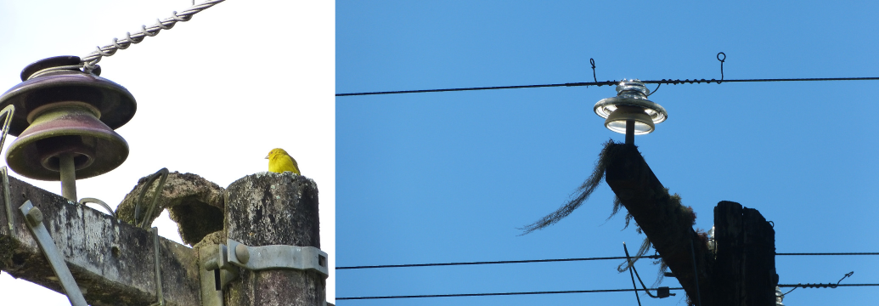

In [2]:
from IPython.display import Image
Image("Images/Overhead-Power-Lines.png", width = 950) 

Nas redes de distribuição de energia elétrica são utilizados isoladores
elétricos, que têm como finalidades dar sustentação mecânica aos cabos
e isolamento elétrico. A verificação da qualidade dos isoladores elétricos
instalados possui uma metodologia baseada no conhecimento adquirido
por técnicos, sendo que esta verificação não é realizada sem a análise
intuitiva de um profissional.

## 1. Preparação do conjunto de dados

Inicialmente nesta sessão, será realizada a leitura dos dados cujo contém as caracteristicas extraídas de nosso conjunto de dados que contém os sinais ultrassônicos puros, com o propósito apenas de sua composição.

Para realizar esta extrassão de caracteristicas, utilizamos de códigos em Matlab, contidos em PreProcessing/NOMECODIGO.MAT, neste, foi realizado a leitura dos sinais captados, os quais foram divididos em intervalos de tempo menores a partir disto, foi realizados a extração da Media, do RMS, Maximo, Minimo,	DesvioPadrao e Variancia.

Após isto, será realizado nesta sessão, a leitura do dataset com os itens intercalados, cujo pré-processamento, também foi realizado em MatLab, contido em PreProcessing/NOMECODIGO2.MAT. Com estes dados em memória, será realizado sua normalização e modelado as entradas e saídas dos modelos.

### 1.1 Leitura de Dados

Nesta sessão, será realizada leitura dos dados extraídos a partir dos sinais ultrassônicos com frequência de amostragem de até 500kHz, apresentado. Os dados foram adquiridos com o software disponibilizado pelo fabricante do microfone, e foram gravados em arquivos em formato WAV (Waveform Audio File Format), que posteriormente foram lidos e processados pelo software Matlab® Mathworks

In [2]:
import os 
import pandas as pd 

data = pd.read_csv(os.path.join('Data','DadosExtraidos.csv'))
data = pd.DataFrame(data)
data.head()

,Classificador,Media,RMS,Maximo,Minimo,DesvioPadrao,Variancia
0,1,0.000027,0.001845,0.011963,-0.010864,0.001845,0.000003
1,1,0.000025,0.001853,0.016022,-0.012115,0.001853,0.000003
2,1,0.000026,0.001868,0.016266,-0.011505,0.001868,0.000003
3,1,0.000026,0.001877,0.013855,-0.011566,0.001877,0.000004
4,1,0.000026,0.001916,0.013184,-0.012878,0.001916,0.000004


In [3]:
data.tail()

,Classificador,Media,RMS,Maximo,Minimo,DesvioPadrao,Variancia
1995,5,0.000025,0.002748,0.013672,-0.015167,0.002748,0.000008
1996,5,0.000024,0.002591,0.016602,-0.012299,0.002591,0.000007
1997,5,0.000024,0.002694,0.015656,-0.013733,0.002694,0.000007
1998,5,0.000026,0.002423,0.012299,-0.011841,0.002423,0.000006
1999,5,0.000026,0.002257,0.021698,-0.015564,0.002257,0.000005


### 1.2 Analizando o conjunto de dados

Nessa sessão pode ser observado que os dados estão muito bem estruturados entretanto ainda não se encontram normalizados, portando tendo valores com máximo e minimo em ordem de grandezas diferentes.

In [4]:
data.describe()

,Classificador,Media,RMS,Maximo,Minimo,DesvioPadrao,Variancia
count,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.0000,0.000025,0.004425,0.021518,-0.019779,0.004425,0.000043
std,2.0005,0.000003,0.004853,0.016378,0.017470,0.004854,0.000095
min,1.0000,-0.000007,0.001335,0.010376,-0.100006,0.001334,0.000002
25%,1.0000,0.000024,0.001844,0.013367,-0.017006,0.001844,0.000003
50%,3.0000,0.000025,0.001962,0.014862,-0.012207,0.001962,0.000004
75%,5.0000,0.000026,0.003675,0.018112,-0.010681,0.003675,0.000014
max,5.0000,0.000059,0.023748,0.102875,-0.007965,0.023748,0.000564



Fórmula utilizada para calcular o Valor Médio:

\begin{equation}
{ V }_{ MED } = \frac { 1 }{ T }\int _{ 0 }^{ T }{ v(t)dt }
\end{equation}

Fórmula utilizada para calcular o Valor RMS:

\begin{equation*}
{\displaystyle (1)x_{\mathrm {rms} }={\sqrt {{1 \over N}\sum _{i=1}^{N}x_{i}^{2}}}={\sqrt {{x_{1}^{2}+x_{2}^{2}+\cdots +x_{N}^{2}} \over N}}}
\end{equation*}

Fórmula utilizada para calcular o Desvio padrão:

\begin{equation*}
{\displaystyle \sigma ={\sqrt {\sum _{i=1}^{N}p_{i}(x_{i}-\mu )^{2}}}},
\end{equation*}

Fórmula utilizada para calcular a variância:

\begin{equation*}
s^{2}=\frac{\sum_{i=1}^{n}\left ( X_{i}-\bar{X} \right )^{2}}{n-1}
\end{equation*}

In [5]:
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
  
cf.go_offline()
init_notebook_mode(connected=True)

data[['Media', 'RMS', 'Maximo', 'Minimo', 'DesvioPadrao', 'Variancia']].iplot()

In [6]:
data[['Classificador']].iplot()


### 1.3 Realizando a leitura dos dados Intercalados - Matlab

In [7]:
data = pd.read_csv(os.path.join('Data','DadosExtraidosIntercalados.csv'))
data = pd.DataFrame(data)
data.head()

,Classificador,Media,RMS,Maximo,Minimo,DesvioPadrao,Variancia
0,1,0.000027,0.001845,0.011963,-0.010864,0.001845,0.000003
1,5,0.000022,0.004056,0.018921,-0.015594,0.004056,0.000016
2,1,0.000025,0.001853,0.016022,-0.012115,0.001853,0.000003
3,5,0.000026,0.003806,0.019684,-0.017487,0.003806,0.000014
4,1,0.000026,0.001868,0.016266,-0.011505,0.001868,0.000003


Comparar com o describe anterior, para verificar a veraticidade dos dados

In [8]:
data.describe()

,Classificador,Media,RMS,Maximo,Minimo,DesvioPadrao,Variancia
count,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.0000,0.000025,0.004425,0.021518,-0.019779,0.004425,0.000043
std,2.0005,0.000003,0.004853,0.016378,0.017470,0.004854,0.000095
min,1.0000,-0.000007,0.001335,0.010376,-0.100006,0.001334,0.000002
25%,1.0000,0.000024,0.001844,0.013367,-0.017006,0.001844,0.000003
50%,3.0000,0.000025,0.001962,0.014862,-0.012207,0.001962,0.000004
75%,5.0000,0.000026,0.003675,0.018112,-0.010681,0.003675,0.000014
max,5.0000,0.000059,0.023748,0.102875,-0.007965,0.023748,0.000564


In [9]:
data[['Media', 'RMS', 'Maximo', 'Minimo', 'DesvioPadrao', 'Variancia']].iplot()

### 1.4 Normalizando os dados

Visto que nosso conjunto de dados é composto por caracteristicas contidas em diferentes, esta sessão visa normalizar os dados, deixando-os em um mesmo intervalo de valor. Foi escolhido como minimo e máximo, zero e um respectivamente, pois tende a facilitar o aprendizado dos modelos

In [10]:
from sklearn.preprocessing import MinMaxScaler
def get_normalised_data(data):
    '''
    Normaliza os dados numéricos (data) utilizando do método MinMaxScaler obtido da api Sklearn.
    
    Parameters:
    - data: conjunto de dados no formato Pandas DataFrame  
    '''
     
    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data))
    
    return data

y_data = data[['Classificador']]
x_data = data[['Media', 'RMS', 'Maximo', 'Minimo', 'DesvioPadrao', 'Variancia']]
x_data = get_normalised_data(x_data)

In [11]:
x_data.iplot()

### 1.5 Separando os dados para o treino e teste do modelo

Para assegurar que nosso modelo é confiável e aplicavel em uma situação real, foi separado o conjunto de dados em treino (75% dos exemplos) e teste (25% dos exemplos). Com isto o modelo irá aprender apenas com o conjunto de treino, e então, será medida sua acurácia com os dados de teste, estes, nunca vistos anteriormente pelo modelo.

In [12]:
import math 
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

x_data = np.array(x_data)
y_data = np.array(y_data).ravel()

tscv = TimeSeriesSplit(n_splits=3)
 
for train_index, test_index in tscv.split(x_data): 
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]  

# Show the results of the split 
print('%.1f%% dos dados foram separados para treinamento. Total de %.0f exemplos' 
      % (100 * x_train.shape[0] / x_data.shape[0], x_train.shape[0]))
print('%.1f%% dos dados foram separados para a realização de testes. Total de %.0f exemplos' 
      % (100 * x_test.shape[0] / x_data.shape[0], x_test.shape[0]))



75.0% dos dados foram separados para treinamento. Total de 1500 exemplos
25.0% dos dados foram separados para a realização de testes. Total de 500 exemplos


## 2. Os modelos de Machine Learning

O Objetivo desta sessão é criar, treinar, avaliar e aprimorar um modelo de aprendizado de máquina capaz de classificar o estado do isolador elétrico. Com isto, na sessão 2.1 será criado um modelo de arvore de decisão, com os parâmetros padrões da biblioteca sklearn. Na sessão 2.2 por sua vez, será utilizado da técnica Grid Search na tentativa de encontrar os melhores parâmetros para o modelo.

### 2.1 Os modelos não aprimorados

Uma das formas mais simples e com alto nível de acurácia é a utilização da metodologia de aprendizado de máquina chamada da árvore de decisão sendo um algoritmo que trabalha classificado características de forma booleana.


#### 2.1.1 Criando

In [13]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

#### 2.1.2 Treinando

In [14]:
svc.fit(x_train, y_train)

c:\programdata\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### 2.1.3 Avaliando

In [17]:
from sklearn.metrics import accuracy_score

test_predictions_SVC  = svc.predict(x_test)
train_predictions_SVC = svc.predict(x_train) 

print(accuracy_score(y_train, train_predictions_SVC))
print(accuracy_score(y_test, test_predictions_SVC)) 

0.8973333333333333
0.678


In [18]:
test_predictions_DTC  = dtc.predict(x_test)
train_predictions_DTC = dtc.predict(x_train) 

print(accuracy_score(y_train, train_predictions_DTC))
print(accuracy_score(y_test, test_predictions_DTC)) 

1.0
0.98


In [19]:
test_predictions_KNN  = knn.predict(x_test)
train_predictions_KNN = knn.predict(x_train) 

print(accuracy_score(y_train, train_predictions_KNN))
print(accuracy_score(y_test, test_predictions_KNN)) 

0.992
0.97


### 2.2 Os modelos aprimorados

Após a validação dos algoritmos, com intuito de encontrar os melhores parâmetros para os modelos, foi utilizada a técnica de Grid Search, que consiste na especificação de um conjunto finito de valores para cada hiperparâmetro à ser otimizado, com isto, o algoritmo pesquisa a grade formada e avalia o produto cartesiano desses conjuntos Feurer, M., Hutter, F. Com esta etapa concluída, os modelos foram novamente avaliados em um conjunto de dados de teste, possibilitando comparar suas precisões e validar os aprimoramentos realizados. 


#### 2.2.1 Criando

In [20]:
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

#### 2.2.2 Aprimorando

In [21]:
from sklearn.model_selection import GridSearchCV 

parameters = [{'C': [0.25, 0.5, 1, 1.5, 2], 
               'degree': [2, 3, 4, 6],
               'coef0': [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.7]
              }]

grid_obj = GridSearchCV(svc, parameters, verbose=1, cv=3, n_jobs=-1) 

grid_obj.fit(x_train, y_train)

svc = grid_obj.best_estimator_

print("Best Parameters")
print(grid_obj.best_params_) 

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    5.2s


Best Parameters
{'C': 2, 'coef0': 0.0, 'degree': 2}


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    7.6s finished
c:\programdata\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [22]:
parameters = [{'criterion': ['gini', 'entropy'],
               'min_impurity_decrease': [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.7]
              }]
 
grid_obj = GridSearchCV(dtc, parameters, verbose=1, cv=3, n_jobs=-1) 

grid_obj.fit(x_train, y_train)

dtc = grid_obj.best_estimator_

print("Best Parameters")
print(grid_obj.best_params_) 

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Parameters
{'criterion': 'gini', 'min_impurity_decrease': 0.0}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished


In [23]:
parameters = [{'n_neighbors': [2, 3, 4, 5, 6],
               'weights': ['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              }]
 
grid_obj = GridSearchCV(knn, parameters, verbose=1, cv=3, n_jobs=-1) 

grid_obj.fit(x_train, y_train)

knn = grid_obj.best_estimator_

print("Best Parameters")
print(grid_obj.best_params_) 

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s


Best Parameters
{'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:    2.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.6s finished


#### 2.2.3 Avaliando

In [24]:
test_predictions_SVC  = svc.predict(x_test)
train_predictions_SVC = svc.predict(x_train) 

print(accuracy_score(y_train, train_predictions_SVC))
print(accuracy_score(y_test, test_predictions_SVC)) 

0.9293333333333333
0.78


In [25]:
test_predictions_DTC  = dtc.predict(x_test)
train_predictions_DTC = dtc.predict(x_train) 

print(accuracy_score(y_train, train_predictions_DTC))
print(accuracy_score(y_test, test_predictions_DTC)) 

1.0
0.964


In [26]:
test_predictions_KNN  = knn.predict(x_test)
train_predictions_KNN = knn.predict(x_train) 

print(accuracy_score(y_train, train_predictions_KNN))
print(accuracy_score(y_test, test_predictions_KNN)) 

1.0
0.976


### 3. Comparando os resultados

Após o aprimoramento dos algoritmos, foi obtido 78,0% de acurácia para o Support Vector Machine, 97,6% para o K-Nearest Neighbors e 98,8% para o algoritmo Decision Tree. Desta maneira, ambos os algoritmos obtiveram uma boa acurácia nos conjuntos de testes, se destacando o algoritmo Decision Tree (Árvore de Decisão), o qual obteve uma melhora de 2,2% em suas classificações. Com isso, o modelo de Aprendizado de Máquina proposto chegou a 98,8% de acerto na classificação dos tipos de isoladores, obtendo desta maneira, 494 acertos e apenas 6 erros no conjunto de teste.

Destaca-se a utilização do algoritmo de Árvore de Decisão para a classificação de estados de isoladores elétricos, pois dentre os 500 exemplos separados para teste, em que o algoritmo não teve acesso durante seu treinamento, ele obteve um total de 494 acertos e apenas 6 erros. ambos os algoritmos obtiveram uma boa acurácia nos conjuntos de testes, se destacando o algoritmo de Árvore de Decisão, o qual obteve uma melhora de 2,2% em suas classificações. Com isso, o modelo de Aprendizado de Máquina proposto chegou a 98,8% de acerto na classificação dos tipos de isoladores, obtendo desta maneira, 494 acertos e apenas 6 erros no conjunto de teste.


### 4. Considerações finais e trabalhos futuros

Algumas sugestões para trabalhos futuros. A primeira é realizar a coleta de mais dados com configurações diferentes de isoladores, como por exemplo: isoladores sujos sem salinidade, isoladores sujos com salinidade, isoladores perfurados sujos etc., bem como a obtenção das formas de onda de ruídos. Pois com isto é possível aumentar a confiabilidade do modelo. Destaca-se também, que outros modelos de Aprendizado de Máquina podem ser utilizados para a classificação destes isoladores. acredita-se ser relevante para esta aplicação, os modelos baseados em Redes Neurais Artificiais, visto que esta abordagem se torna melhor utilizável à medida que a quantidade de exemplos de dados vão aumentando, não deixando de destacar que a precisão destes modelos tem crescido significativamente em aplicações complexas durante os últimos anos Goodfellow, Bengio & Courville (2016). 


### 5. Referências

Russel, S., & Norvig, P. (2004) “Inteligência Artificial”, 2ª. Edição. Rio de Janeiro: Campus.

Goodfellow, I., Bengio, Y., & Courville, A. (2016) “Deep learning” MIT press.
